安装Pillow
如果安装了Anaconda，Pillow就已经可用了。否则，需要在命令行下通过pip安装：
$ pip install pillow
如果遇到Permission denied安装失败，请加上sudo重试。
操作图像
来看看最常见的图像缩放操作，只需三四行代码：

In [3]:
from PIL import Image

im = Image.open('test.jpg')

w,h = im.size

print('Original image size: %sx%s' % (w, h))

im.thumbnail((w//2, h//2))

print('Resize image to: %sx%s' % (w//2, h//2))

im.save('thumbnail.jpg', 'jpeg')

Original image size: 1000x750
Resize image to: 500x375


其他功能如切片、旋转、滤镜、输出文字、调色板等一应俱全。

比如，模糊效果也只需几行代码：

In [6]:
from PIL import Image, ImageFilter

im = Image.open('test.jpg')

im2 = im.filter(ImageFilter.BLUR)
im3 = im2.filter(ImageFilter.BLUR)
im4 = im3.filter(ImageFilter.BLUR)
im5 = im4.filter(ImageFilter.BLUR)
im6 = im5.filter(ImageFilter.BLUR)
im7 = im6.filter(ImageFilter.BLUR)
im8 = im7.filter(ImageFilter.BLUR)
im9 = im8.filter(ImageFilter.BLUR)
im10 = im9.filter(ImageFilter.BLUR)
im11 = im10.filter(ImageFilter.BLUR)
im12 = im11.filter(ImageFilter.BLUR)
im13 = im12.filter(ImageFilter.BLUR)
im14 = im13.filter(ImageFilter.BLUR)

im14.save('blur14.jpg','jpeg')

PIL的ImageDraw提供了一系列绘图方法，让我们可以直接绘图。比如要生成字母验证码图片

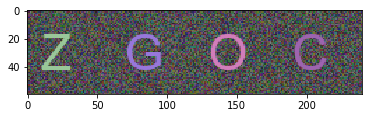

In [24]:
from PIL import Image, ImageDraw, ImageFont, ImageFilter
import random
import matplotlib.pyplot as plt

def rndChar():
    return chr(random.randint(65, 90)) #chr()根据ASCII码，出字符
    #65-90是a-z,A-Z
    
def rndColor():
    return (random.randint(64, 255), random.randint(64, 255), random.randint(64, 255)) #返回RGB三色值

def rndColor2():
    return (random.randint(32, 127), random.randint(32, 127), random.randint(32, 127))

width = 60 * 4
height = 60

image = Image.new('RGB',(width,height),(255,255,255))
font = ImageFont.truetype('Arial.ttf',36)
draw = ImageDraw.Draw(image)

for x in range(width):
    for y in range(height):
        draw.point((x, y), fill=rndColor2())
        
for t in range(4):
    draw.text((60 * t + 10, 10), rndChar(), font=font, fill=rndColor())
    
plt.imshow(image)
plt.show(image)

## requests

我们已经讲解了Python内置的urllib模块，用于访问网络资源。但是，它用起来比较麻烦，而且，缺少很多实用的高级功能。

更好的方案是使用requests。它是一个Python第三方库，处理URL资源特别方便。

### 安装requests
如果安装了Anaconda，requests就已经可用了。否则，需要在命令行下通过pip安装：

```
$ pip install requests
```
如果遇到Permission denied安装失败，请加上sudo重试

In [27]:
import requests
r = requests.get('https://www.douban.com/')
r.status_code #状态码200，表示请求成功，服务器成功提供请求的网站

200

In [28]:
r.text

'<!DOCTYPE HTML>\n<html lang="zh-cmn-Hans" class="">\n<head>\n<meta charset="UTF-8">\n<meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n<meta name="description" content="提供图书、电影、音乐唱片的推荐、评论和价格比较，以及城市独特的文化生活。">\n<meta name="keywords" content="豆瓣,广播,登陆豆瓣">\n<meta property="qc:admins" content="2554215131764752166375" />\n<meta property="wb:webmaster" content="375d4a17a4fa24c2" />\n<meta name="mobile-agent" content="format=html5; url=https://m.douban.com">\n<title>豆瓣</title>\n<script>\nfunction set_cookie(t,e,o,n){var i,a,r=new Date;r.setTime(r.getTime()+24*(e||30)*60*60*1e3),i="; expires="+r.toGMTString();for(a in t)document.cookie=a+"="+t[a]+i+"; domain="+(o||"douban.com")+"; path="+(n||"/")}function get_cookie(t){var e,o,n=t+"=",i=document.cookie.split(";");for(e=0;e<i.length;e++){for(o=i[e];" "==o.charAt(0);)o=o.substring(1,o.length);if(0===o.indexOf(n))return o.substring(n.length,o.length).replace(/\\"/g,"")}return null}window.Douban=window

In [31]:
#对于带参数的URL，传入一个dict作为params参数：
r = requests.get('https://www.douban.com/search', params={'q':'python', 'cat':'1001'})

r.url


'https://www.douban.com/search?q=python&cat=1001'

In [33]:
#requests自动检测编码，可以使用encoding属性查看：
r.encoding

'utf-8'

无论响应是文本还是二进制内容，我们都可以用content属性获得bytes对象：


In [34]:
r.content

b'<!DOCTYPE html>\n<html lang="zh-cmn-Hans" class="">\n<head>\n    <meta http-equiv="Content-Type" content="text/html; charset=utf-8">\n    <meta name="renderer" content="webkit">\n    <meta name="referrer" content="always">\n    <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n    <title>\n  \xe6\x90\x9c\xe7\xb4\xa2: python\n</title>\n    \n  \n    <meta http-equiv="Pragma" content="no-cache">\n    <meta http-equiv="Expires" content="Sun, 6 Mar 2005 01:00:00 GMT">\n    \n<link rel="search" type="application/opensearchdescription+xml" title="\xe8\xb1\x86\xe7\x93\xa3\xe6\x90\x9c\xe7\xb4\xa2" href="/opensearch">\n\n    <script >var _head_start = new Date();</script>\n    <script src="https://img3.doubanio.com/f/shire/72ced6df41d4d158420cebdd254f9562942464e3/js/jquery.min.js"></script>\n    <script src="https://img3.doubanio.com/f/shire/1316664523258f7b8b536e4ce45afc9cb37b8963/js/douban.js"></script>\n    <link href="https://img3.doubanio.com

requests的方便之处还在于，对于特定类型的响应，例如JSON，可以直接获取

In [37]:
r = requests.get('https://query.yahooapis.com/v1/public/yql?q=select%20*%20from%20weather.forecast%20where%20woeid%20%3D%202151330&format=json')
r.json()
#此网站不行了🚫

ConnectionError: HTTPSConnectionPool(host='query.yahooapis.com', port=443): Max retries exceeded with url: /v1/public/yql?q=select%20*%20from%20weather.forecast%20where%20woeid%20%3D%202151330&format=json (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x1143caef0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

In [45]:
#需要传入HTTP Header时，我们传入一个dict作为headers参数
r = requests.get('https://www.douban.com/', headers={'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit'})
# r = requests.get('https://www.douban.com/', headers={'User-Agent': 'Mozilla/5.0 (iPhone; CPU iPhone OS 11_0 like Mac OS X) AppleWebKit'})
r.text

'\n\n<!DOCTYPE html>\n<html itemscope itemtype="http://schema.org/WebPage" class="ua-mobile ">\n  <head>\n      <meta charset="UTF-8">\n      <title>豆瓣(手机版)</title>\n      <meta name="google-site-verification" content="ok0wCgT20tBBgo9_zat2iAcimtN4Ftf5ccsh092Xeyw" />\n      <meta name="viewport" content="width=device-width, height=device-height, user-scalable=no, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0">\n      <meta name="format-detection" content="telephone=no">\n      <meta name="description" content="读书、看电影、涨知识、学穿搭...，加入兴趣小组，获得达人们的高质量生活经验，找到有相同爱好的小伙伴。">\n      <meta name="keywords" content="豆瓣,手机豆瓣,豆瓣手机版,豆瓣电影,豆瓣读书,豆瓣同城">\n      <link rel="canonical" href="\nhttp://m.douban.com/">\n      <link href="https://img3.doubanio.com/f/talion/8d84a75b70e143438e6441a7ef95224142100474/css/card/base.css" rel="stylesheet">\n      \n      <link rel="stylesheet" href="https://img3.doubanio.com/misc/mixed_static/533ea445d458838e.css">\n      <link rel="icon" type="image/png" sizes="1

要发送POST请求，只需要把get()方法变成post()，然后传入data参数作为POST请求的数据

In [ ]:
r = requests.post('https://accounts.douban.com/login', data={'form_email': 'abc@example.com', 'form_password': '123456'})

requests默认使用application/x-www-form-urlencoded对POST数据编码。如果要传递JSON数据，可以直接传入json参数

In [ ]:
params = {'key': 'value'}
r = requests.post(url, json=params) # 内部自动序列化为JSON

In [ ]:
#类似的，上传文件需要更复杂的编码格式，但是requests把它简化成files参数
upload_files = {'file': open('report.xls','rb')} #dict
r = requests.post(url, files=upload_files)
#在读取文件时，注意务必使用'rb'即二进制模式读取，这样获取的bytes长度才是文件的长度
#把post()方法替换为put()，delete()等，就可以以PUT或DELETE方式请求资源

In [46]:
#除了能轻松获取响应内容外，requests对获取HTTP响应的其他信息也非常简单。例如，获取响应头
r.headers

{'Date': 'Tue, 09 Jul 2019 07:02:36 GMT', 'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Keep-Alive': 'timeout=30', 'Vary': 'Accept-Encoding', 'X-Xss-Protection': '1; mode=block', 'X-Douban-Mobileapp': '0', 'Expires': 'Sun, 1 Jan 2006 01:00:00 GMT', 'Pragma': 'no-cache', 'Cache-Control': 'must-revalidate, no-cache, private', 'X-DAE-Node': 'brand45', 'X-DAE-App': 'talion', 'Server': 'dae', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=15552000;', 'X-Content-Type-Options': 'nosniff', 'Content-Encoding': 'gzip'}

In [47]:
r.headers['Content-Type']

'text/html; charset=utf-8'

In [49]:
#requests对Cookie做了特殊处理，使得我们不必解析Cookie就可以轻松获取指定的Cookie：

r.cookies

<RequestsCookieJar[]>

In [ ]:
#要在请求中传入Cookie，只需准备一个dict传入cookies参数：

cs = {'token': '12345', 'status': 'working'}
r = requests.get{url, cookies=cs}

In [ ]:
#最后，要指定超时，传入以秒为单位的timeout参数：
r = requests.get(url, timeout=2.5)

字符串编码一直是令人非常头疼的问题，尤其是我们在处理一些不规范的第三方网页的时候。虽然Python提供了Unicode表示的str和bytes两种数据类型，并且可以通过encode()和decode()方法转换，但是，在不知道编码的情况下，对bytes做decode()不好做。

对于未知编码的bytes，要把它转换成str，需要先“猜测”编码。猜测的方式是先收集各种编码的特征字符，根据特征字符判断，就能有很大概率“猜对”。

当然，我们肯定不能从头自己写这个检测编码的功能，这样做费时费力。chardet这个第三方库正好就派上了用场。用它来检测编码，简单易用。

In [58]:
import chardet
# chardet
chardet.detect(b'Hello, world!')
#confidence 表示检测的概率

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}

In [63]:
data = '离离原上草，一岁一枯荣'.encode('gbk')
chardet.detect(data)

{'confidence': 0.7407407407407407, 'encoding': 'GB2312', 'language': 'Chinese'}

In [68]:
data = '离离原上草，一岁一枯荣'.encode('utf-8')
# chardet.detect(data)
type(data)

bytes

In [69]:
data = '最新の主要ニュース'.encode('euc-jp')
chardet.detect(data)

{'confidence': 0.99, 'encoding': 'EUC-JP', 'language': 'Japanese'}

psutil
用Python来编写脚本简化日常的运维工作是Python的一个重要用途。在Linux下，有许多系统命令可以让我们时刻监控系统运行的状态，如ps，top，free等等。要获取这些系统信息，Python可以通过subprocess模块调用并获取结果。但这样做显得很麻烦，尤其是要写很多解析代码。

在Python中获取系统信息的另一个好办法是使用psutil这个第三方模块。顾名思义，psutil = process and system utilities，它不仅可以通过一两行代码实现系统监控，还可以跨平台使用，支持Linux／UNIX／OSX／Windows等，是系统管理员和运维小伙伴不可或缺的必备模块。

In [70]:
import psutil
psutil.cpu_count()
#CPU
#CPU逻辑数量

4

In [71]:
psutil.cpu_count(logical=False)
#CPU物理核心
#2说明是双核超线程, 4则是4核非超线程
#两个物理CPU,每一个都被逻辑化为双核

2

In [72]:
#统计CPU的用户／系统／空闲时间
psutil.cpu_times()

scputimes(user=20647.71, nice=0.0, system=8934.56, idle=222154.6)

In [74]:
#再实现类似top命令的CPU使用率，每秒刷新一次，累计10次
for x in range(10):
    psutil.cpu_percent(interval=1,percpu=True)
#interval指定的是计算cpu使用率的时间间隔
#percpu是指指定是选择总的使用率还是每个cpu的使用率。

获取内存信息<br/>
使用psutil获取物理内存和交换内存信息，分别使用

In [75]:
psutil.virtual_memory()

svmem(total=8589934592, available=2799910912, percent=67.4, used=6339776512, free=904708096, active=2261561344, inactive=1895202816, wired=2183012352)

In [76]:
psutil.swap_memory()
#返回的是字节为单位的整数，可以看到，总内存大小是8589934592 = 8 GB，
#已用7201386496 = 6.7 GB，使用了66.6%。
#而交换区大小是1073741824 = 1 GB。



sswap(total=2147483648, used=1274544128, free=872939520, percent=59.4, sin=8059899904, sout=53858304)

获取磁盘信息<br/>
可以通过psutil获取磁盘分区、磁盘使用率和磁盘IO信息：

In [77]:
psutil.disk_partitions()#磁盘分区信息

[sdiskpart(device='/dev/disk1s1', mountpoint='/', fstype='apfs', opts='rw,local,rootfs,dovolfs,journaled,multilabel'),
 sdiskpart(device='/dev/disk1s4', mountpoint='/private/var/vm', fstype='apfs', opts='rw,noexec,local,dovolfs,dontbrowse,journaled,multilabel,noatime')]

In [78]:
psutil.disk_usage('/')# 磁盘使用情况

sdiskusage(total=93790908416, used=79349473280, free=10522767360, percent=88.3)

In [79]:
psutil.disk_io_counters()#磁盘IO
#可以看到，磁盘'/'的总容量是998982549504 = 930 GB，使用了39.1%。
#文件格式是HFS，opts中包含rw表示可读写，journaled表示支持日志

sdiskio(read_count=640645, write_count=807032, read_bytes=24411047936, write_bytes=11940581376, read_time=628492, write_time=300241)

获取网络信息<br/>
psutil可以获取网络接口和网络连接信息

In [80]:
psutil.net_io_counters()# 获取网络读写字节／包的个数

snetio(bytes_sent=140467200, bytes_recv=414919680, packets_sent=404975, packets_recv=525864, errin=0, errout=0, dropin=0, dropout=0)

In [81]:
psutil.net_if_addrs()# 获取网络接口信息

{'awdl0': [snic(family=<AddressFamily.AF_LINK: 18>, address='a6:b3:8a:30:e2:be', netmask=None, broadcast=None, ptp=None),
  snic(family=<AddressFamily.AF_INET6: 30>, address='fe80::a4b3:8aff:fe30:e2be%awdl0', netmask='ffff:ffff:ffff:ffff::', broadcast=None, ptp=None)],
 'bridge0': [snic(family=<AddressFamily.AF_LINK: 18>, address='72:00:03:47:37:40', netmask=None, broadcast=None, ptp=None)],
 'en0': [snic(family=<AddressFamily.AF_INET: 2>, address='192.168.1.102', netmask='255.255.255.0', broadcast='192.168.1.255', ptp=None),
  snic(family=<AddressFamily.AF_LINK: 18>, address='3c:15:c2:be:27:90', netmask=None, broadcast=None, ptp=None),
  snic(family=<AddressFamily.AF_INET6: 30>, address='fe80::4dc:e667:8b1b:2c81%en0', netmask='ffff:ffff:ffff:ffff::', broadcast=None, ptp=None)],
 'en1': [snic(family=<AddressFamily.AF_LINK: 18>, address='72:00:03:47:37:40', netmask=None, broadcast=None, ptp=None)],
 'en2': [snic(family=<AddressFamily.AF_LINK: 18>, address='72:00:03:47:37:41', netmask=No

In [82]:
psutil.net_if_stats()# 获取网络接口状态

{'XHC20': snicstats(isup=False, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mtu=0),
 'awdl0': snicstats(isup=True, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mtu=1484),
 'bridge0': snicstats(isup=True, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mtu=1500),
 'en0': snicstats(isup=True, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mtu=1500),
 'en1': snicstats(isup=True, duplex=<NicDuplex.NIC_DUPLEX_FULL: 2>, speed=0, mtu=1500),
 'en2': snicstats(isup=True, duplex=<NicDuplex.NIC_DUPLEX_FULL: 2>, speed=0, mtu=1500),
 'gif0': snicstats(isup=False, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mtu=1280),
 'lo0': snicstats(isup=True, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mtu=16384),
 'p2p0': snicstats(isup=True, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mtu=2304),
 'stf0': snicstats(isup=False, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mtu=1280),
 'utun0': snicstats(isup=True, duplex=<NicDuplex.NIC_DUPLEX_UNKNOWN: 0>, speed=0, mt

获取进程信息<br/>
通过psutil可以获取到所有进程的详细信息

In [83]:
psutil.pids()

[21263,
 20435,
 20007,
 20006,
 19935,
 19802,
 19801,
 19788,
 19756,
 19740,
 19727,
 19719,
 19718,
 19707,
 19159,
 19090,
 19074,
 19067,
 19031,
 18848,
 18847,
 18846,
 17388,
 17387,
 16028,
 14370,
 13999,
 13714,
 13713,
 13708,
 13703,
 13454,
 13451,
 12768,
 12628,
 12547,
 12546,
 12545,
 12441,
 12423,
 12411,
 12101,
 11665,
 11654,
 11653,
 11539,
 11532,
 11284,
 9901,
 9871,
 9595,
 7447,
 3612,
 3608,
 2047,
 1561,
 1502,
 1419,
 1415,
 1412,
 1411,
 1409,
 1403,
 1402,
 1401,
 1400,
 1396,
 1395,
 901,
 881,
 874,
 873,
 819,
 731,
 712,
 693,
 685,
 672,
 667,
 666,
 664,
 618,
 616,
 606,
 555,
 550,
 539,
 530,
 527,
 526,
 525,
 524,
 522,
 521,
 510,
 508,
 499,
 498,
 492,
 491,
 489,
 488,
 479,
 478,
 476,
 475,
 473,
 472,
 471,
 470,
 468,
 466,
 463,
 462,
 461,
 457,
 456,
 453,
 451,
 450,
 449,
 445,
 441,
 440,
 433,
 431,
 429,
 427,
 426,
 420,
 419,
 418,
 417,
 410,
 409,
 408,
 407,
 406,
 402,
 399,
 397,
 396,
 395,
 394,
 392,
 389,
 385,
 3

In [84]:
p = psutil.Process(3612)
p.name() #进程名称

'com.apple.accessibility.mediaaccessibilityd'

In [85]:
p.exe()#进程exe路径

'/System/Library/Frameworks/MediaAccessibility.framework/Versions/A/XPCServices/com.apple.accessibility.mediaaccessibilityd.xpc/Contents/MacOS/com.apple.accessibility.mediaaccessibilityd'

In [86]:
p.cwd()#进程工作目录

'/Users/chenjin/Library/Containers/com.apple.accessibility.mediaaccessibilityd/Data'

In [87]:
p.cmdline()#进程启动的命令行

['/System/Library/Frameworks/MediaAccessibility.framework/Versions/A/XPCServices/com.apple.accessibility.mediaaccessibilityd.xpc/Contents/MacOS/com.apple.accessibility.mediaaccessibilityd']

In [88]:
p.ppid()#父进程ID

1

In [89]:
p.parent()#父进程

<psutil.Process(pid=1, name='launchd') at 4650267592>

In [90]:
p.children()#子进程列表

[]

In [ ]:
p.status()#进程状态

In [ ]:
p.username()#进程用户名

In [ ]:
p.create_time()#进程创建时间

In [ ]:
p.terminal()#进程终端

In [ ]:
p.cpu_times()#进程使用的CPU时间

In [ ]:
p.memory_info()#进程使用的内存

In [ ]:
p.open_files()#进程打开的文件

In [ ]:
p.connections()#进程打开的文件

In [ ]:
p.num_threads()#进程相关网络连接

In [ ]:
p.num_threads()#进程的线程数量

In [ ]:
p.threads()#所有线程信息

In [ ]:
p.environ()#进程环境变量